## Lesson 2. Subtract One Raster from Another

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et
import numpy as np

In [2]:
sns.set(font_scale=1.5, style='whitegrid')

In [3]:
data_path = et.data.get_data('colorado-flood')

**Open DEM**

In [4]:
lidar_dem_path = os.path.join(data_path,
                              'spatial',
                              'boulder-leehill-rd',
                              'pre-flood',
                              'lidar',
                              'pre_DTM.tif')
lidar_dem_xr = rxr.open_rasterio(lidar_dem_path, masked=True).squeeze()
lidar_dem_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [5]:
lidar_dem_xr.rio.crs

CRS.from_epsg(32613)

**Open DSM**

In [6]:
lidar_dsm_path = os.path.join(data_path,
                              'spatial',
                              'boulder-leehill-rd',
                              'pre-flood',
                              'lidar',
                              'pre_DSM.tif')
lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()
lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [7]:
lidar_dsm_xr.rio.crs

CRS.from_epsg(32613)

**Develop CHM**

CHM = DSM - DEM

In [8]:
lidar_dem_xr.rio.bounds() == lidar_dsm_xr.rio.bounds()
lidar_dem_xr.rio.resolution() == lidar_dsm_xr.rio.resolution()

True

True

**Calculate CHM**

In [9]:
lidar_chm_xr = lidar_dsm_xr - lidar_dem_xr

[Text(0.5, 1.0, 'Canopy Height Model for Lee Hill Road, Pre-Flood')]

(472000.0, 476000.0, 4434000.0, 4436000.0)

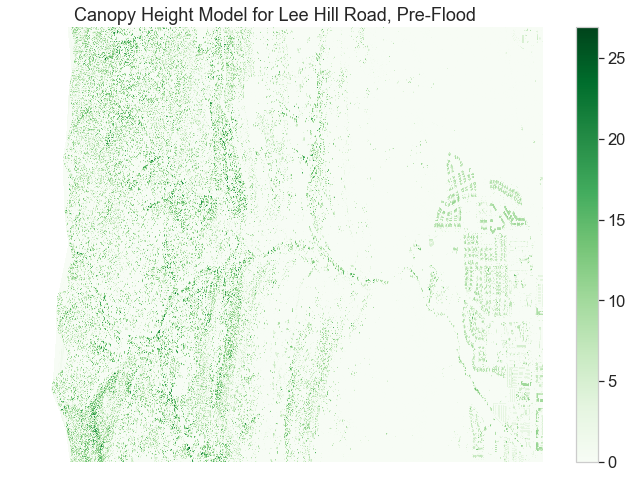

In [10]:
f, ax = plt.subplots(figsize=(12,8))

lidar_chm_xr.plot(ax=ax,
                  cmap='Greens')
ax.set(title='Canopy Height Model for Lee Hill Road, Pre-Flood')
ax.axis('off')
plt.show()

(array([5.846294e+06, 5.079730e+05, 3.710080e+05, 2.406930e+05,
        1.219950e+05, 5.095300e+04, 1.507500e+04, 3.247000e+03,
        4.440000e+02, 4.600000e+01]),
 array([ 0.        ,  2.69300537,  5.38601074,  8.07901611, 10.77202148,
        13.46502686, 16.15803223, 18.8510376 , 21.54404297, 24.23704834,
        26.93005371]),
 <BarContainer object of 10 artists>)

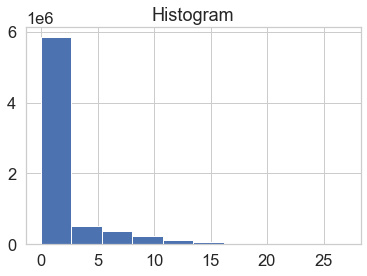

In [11]:
lidar_chm_xr.plot.hist()

In [12]:
print('CHM minimum value', np.nanmin(lidar_chm_xr))
print('CHM maximum value', np.nanmax(lidar_chm_xr))

CHM minimum value 0.0
CHM maximum value 26.9300537109375


**Export Raster to Geotiff using RioXarray**

In [13]:
out_path = os.path.join('colorado-flood',
                        'spatial',
                        'outputs',)
if os.path.exists(out_path):
    print('The directory', os.path.join(os.getcwd(), out_path), 'exists!')
else:
    os.makedirs(out_path)
                        

The directory C:\Users\Glen Shennan\Google Drive\earth-analytics\2.Intermediate\colorado-flood\spatial\outputs exists!


Make sure that output data has a CRS and nodata value defined.

In [14]:
print('The CRS is:', lidar_chm_xr.rio.crs)
print('The nodata value is:', lidar_chm_xr.rio.nodata)

The CRS is: EPSG:32613
The nodata value is: None


In [15]:
pre_chm_out_path = os.path.join(out_path, 'pre-flood-chm.tiff')
pre_chm_out_path

'colorado-flood\\spatial\\outputs\\pre-flood-chm.tiff'

Write the data to geotiff

In [16]:
lidar_chm_xr.rio.to_raster(pre_chm_out_path)

Reopen data to check

In [17]:
lidar_chm_data = rxr.open_rasterio(pre_chm_out_path, masked=True).squeeze()
lidar_chm_data

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
    band         int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

#### Optional Challenge

In [18]:
lidar_chm_data.rio.crs

CRS.from_epsg(32613)

In [19]:
lidar_chm_data.rio.resolution()

(1.0, -1.0)

[Text(0.5, 1.0, 'Lidar CHM for Lee Hill Road')]

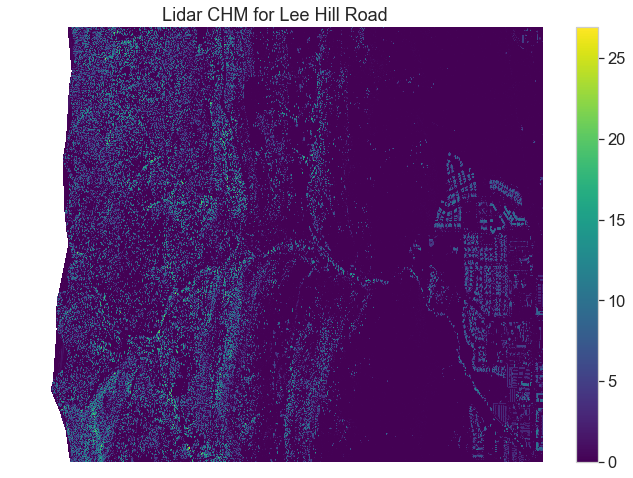

In [20]:
f, ax = plt.subplots(figsize=(12,8))

lidar_chm_data.plot(ax=ax,
                    cmap='viridis')
ax.set(title='Lidar CHM for Lee Hill Road')
ax.set_axis_off()
plt.show()